<a href="https://colab.research.google.com/github/kaiquefreire05/text-classification-spacy/blob/main/text_classification_spacy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de textos com spaCy

# Etapa 1: Instalando as bibliotecas

In [ ]:
!pip install --upgrade spacy

In [ ]:
!python3 -m spacy download pt_core_news_sm

In [142]:
# Bibliotecas necessárias

import spacy
import pandas as pd
import string
import random
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from spacy.lang.pt.stop_words import STOP_WORDS # armazena todas as stop words
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Etapa 2: Carregamento da base de dados

In [104]:
# Carregando a base de dados

base_dados = pd.read_csv('/content/base_treinamento.txt', encoding= 'utf-8')
base_dados.shape

(196, 2)

In [105]:
# Verificando 5 primeiras e últimas linhas

base_dados.head(), base_dados.tail()

(                             texto   emocao
 0        este trabalho é agradável  alegria
 1  gosto de ficar no seu aconchego  alegria
 2       fiz a adesão ao curso hoje  alegria
 3       eu sou admirada por muitos  alegria
 4                  adoro como você  alegria,
                                                  texto emocao
 191  estou chocado e amedrontado com este assassina...   medo
 192  é preciso afugenta com ímpeto este medo do inf...   medo
 193  políticos usam suas forças para afugentar e am...   medo
 194       o objetivo disso e apenas me amedrontar mais   medo
 195                                    isso me apavora   medo)

In [106]:
# Contagem de frases de medo e alegria

base_dados['emocao'].value_counts()

alegria    112
medo        84
Name: emocao, dtype: int64

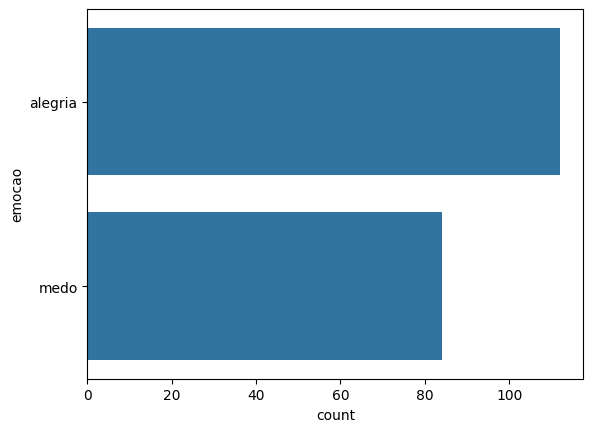

In [107]:
# Contagem de frases de medo e alegria usando Seaborn

sns.countplot(base_dados['emocao'], label= 'Contagem de emoção');

# Função para pré-processamento dos textos

In [108]:
# Armazenando todas as possíveis acentuações em um variável

pontuacoes = string.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [109]:
# Armazenando todas as stop words em uma variável

stop_words = STOP_WORDS
print(stop_words)

{'portanto', 'depois', 'estar', 'estás', 'sete', 'daquela', 'saber', 'lado', 'e', 'apenas', 'dezanove', 'vocês', 'dos', 'estou', 'cujo', 'não', 'entre', 'teu', 'neste', 'ligado', 'à', 'quinze', 'uns', 'foram', 'menos', 'tais', 'esteve', 'naquele', 'toda', 'de', 'minha', 'este', 'vindo', 'fez', 'final', 'poderá', 'pontos', 'ambas', 'inicio', 'teve', 'você', 'vinte', 'inclusive', 'perto', 'tão', 'eventual', 'pode', 'número', 'sexto', 'tarde', 'foi', 'tempo', 'breve', 'sei', 'grandes', 'atrás', 'debaixo', 'quando', 'vai', 'segunda', 'sistema', 'fora', 'maior', 'nesta', 'quer', 'também', 'nosso', 'tivestes', 'só', 'ele', 'quais', 'ora', 'aqueles', 'embora', 'tiveste', 'a', 'zero', 'pelas', 'o', 'põe', 'tentaram', 'des', 'mas', 'fazes', 'baixo', 'nuns', 'desde', 'novas', 'teus', 'último', 'antes', 'for', 'uma', 'onze', 'ter', 'porém', 'contudo', 'diz', 'para', 'meu', 'é', 'nossa', 'ser', 'vossos', 'muitos', 'possível', 'quê', 'então', 'sexta', 'estive', 'após', 'das', 'sobre', 'meses', 'por

In [110]:
# Criando modelo de processamento de palavras

pln = spacy.load('pt_core_news_sm')
pln

In [111]:
# texto teste

teste = 'Estou aPrendendo 1 489 987processamento de linguagem natural. Curso em Orlândia'

In [112]:
# Função de pré-processamento

def preprocessamento(texto):
    """
    This function performs text preprocessing for natural language processing (NLP) purposes. The preprocessing steps include:

    Lowercasing: Converts all text to lowercase letters to avoid case-sensitivity issues.
    Tokenization: Splits the text into tokens, which are basic units of analysis, such as words, punctuation, and numbers.
    Lemmatization: Converts each word to its canonical form (lemma), which is the basic form of the word without grammatical inflections.
    Stop word removal: Removes common words that do not contribute to the meaning of the text, such as "a", "the", "of", "to", etc.
    Punctuation removal: Removes punctuation symbols, such as commas, periods, parentheses, etc.
    Number removal: Removes numbers from the text.

    **Parameters**:
    text: A string text that will be preprocessed.

    **Returns**:
    A list of strings that contains the preprocessed tokens of the text. """

    texto = texto.lower() # convertendo o texto string para minúsculo
    documento = pln(texto) # convertendo a váriavel string que veio do parâmetro
    lista = []

    # percorrendo o documento
    for token in documento:
        lista.append(token.lemma_) # adicionando os lemma

    lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in pontuacoes] # removendo as stop words e pontuações
    lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()]) # removendo possíveis números e retornando tudo na mesma linha no formato string

    return lista

# Pré-processamento da base de dados

## Limpeza dos textos

In [113]:
# Base de dados antes de aplicar a função

base_dados.head()

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria


In [114]:
# Aplicando a função de pré-processamento na coluna de texto

base_dados['texto'] = base_dados['texto'].apply(preprocessamento)

In [115]:
# Depois da aplicação da função

base_dados.head()

,texto,emocao
0,trabalho agradável,alegria
1,gosto ficar em o aconchego,alegria
2,fiz adesão a o curso hoje,alegria
3,admirar,alegria
4,adorar,alegria


## Tratamento de classe

In [116]:
# Base de dados exemplo

base_exemplo = [["este trabalho é adorável", {"ALEGRIA": True, "MEDO": False}],
                ["Este lugar continua assustador", {"ALEGRIA": True, "MEDO": False}]]

print(type(base_exemplo))
print(base_exemplo[0])
print(base_exemplo[0][0])
print(base_exemplo[0][1])
print(type(base_exemplo[0][1]))

<class 'list'>
['este trabalho é adorável', {'ALEGRIA': True, 'MEDO': False}]
este trabalho é adorável
{'ALEGRIA': True, 'MEDO': False}
<class 'dict'>


In [117]:
# Transformando a base de dados em dicionário

base_dados_final = []

for texto, emocao in zip(base_dados['texto'], base_dados['emocao']): # precisa ser passado em zip para acessar os dados

    if emocao == 'alegria':
        dic = {'ALEGRIA': True, 'MEDO': False}

    elif emocao == 'medo':
        dic = {'ALEGRIA': False, 'MEDO': True}

    base_dados_final.append([texto, dic.copy()]) # Adicionando o texto e copiando o respectivo dicionário

print(len(base_dados_final))
print(base_dados_final[0])

196
['trabalho agradável', {'ALEGRIA': True, 'MEDO': False}]


# Etapa 5: Criação de um classificador

In [118]:
# Inicializando modelo

modelo = spacy.blank('pt')
textcat = modelo.add_pipe("textcat") # pipeline de classificação de texto

# Definindo as categorias de classificação
textcat.add_label("ALEGRIA")
textcat.add_label("MEDO")
historico = []

In [119]:
from spacy.training import Example

In [120]:
# Definindo epochs e fazendo o treinamento


modelo.begin_training() # começa o treinamento do modelo
for epoca in range(1000): # laço principal para as épocas

    random.shuffle(base_dados_final) # embaralha os dados para evitar memorização
    losses = {} # dicionário para armazenar as perdas

    # Processa os dados em mini-lotes
    for batch in spacy.util.minibatch(base_dados_final, 30):

        textos = [modelo(texto) for texto, entities in batch] # Extrai os textos do lote
        annotations = [{'cats': entities} for texto, entities in batch] # Cria as anotações para cada texto do lote
        examples = [Example.from_dict(doc, annotation) for doc, annotation in zip(textos, annotations)] # converte os textos e annotatios para o tipo objeto Example
        modelo.update(examples, losses=losses) # Atualiza o modelo com os exemplos e calcula as perdas

    # Imprime as perdas a cada 100 épocas, vai ser imprimido 10 vezes
    if epoca % 100 == 0:
        print(losses)
        historico.append(losses)

{'textcat': 1.7084580808877945}
{'textcat': 2.230511565379234e-11}
{'textcat': 2.839647299853615e-12}
{'textcat': 7.753831925757116e-13}
{'textcat': 2.7538787358361363e-13}
{'textcat': 1.2114174663808942e-13}
{'textcat': 6.14971470455476e-14}
{'textcat': 3.028180924092574e-14}
{'textcat': 1.5353065727321982e-14}
{'textcat': 7.018522624245658e-15}


In [121]:
# Extraindo apenas os valores de loss e transforma em um array do numpy

historico_loss = []
for i in historico:
    historico_loss.append(i.get('textcat'))

historico_loss = np.array(historico_loss)

Text(0, 0.5, 'Erro')

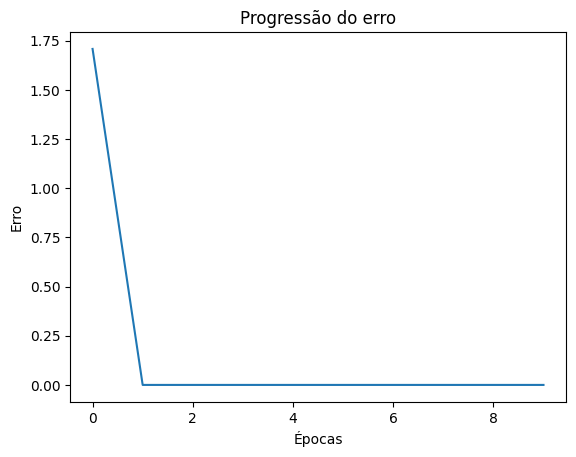

In [122]:
# Plotando gráfico para visualizar progressão de perda

plt.plot(historico_loss)
plt.title('Progressão do erro')
plt.xlabel('Épocas')
plt.ylabel('Erro')

In [123]:
# Salvando o modelo já treinado

modelo.to_disk("modelo")

# Etapa 6: Teste com frase

In [124]:
# Carregando modelo que foi salvo no meu Drive

modelo_carregado = spacy.load("/content/drive/MyDrive/classificadores treinados/modelo")
modelo_carregado

In [125]:
# Criando o texto teste, fazendo o processamento e previsão com texto positivo

texto_positivo = 'eu adoro a cor dos seus olhos' # variável com texto positivo
texto_positivo = preprocessamento(texto_positivo) # pre-processamento
previsao = modelo_carregado(texto_positivo) # prevendo
previsao.cats # obtendo resultado

{'ALEGRIA': 1.0, 'MEDO': 1.626525403253254e-08}

In [126]:
# Fazendo a previsão com texto negativo

texto_negativo = 'estou com medo dele' # variável com texto negativo
previsao = modelo_carregado(preprocessamento(texto_negativo)) # fazendo o pre-processamento e fazendo previsão
previsao.cats  # obtendo resultado

{'ALEGRIA': 1.1116317644166429e-08, 'MEDO': 1.0}

# Etapa 7: Avaliação do modelo

## Avaliando na base de treinamento

In [144]:
# Fazendo previsões dos textos

previsoes = []
for texto in base_dados['texto']:
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

previsoes

[{'ALEGRIA': 1.0, 'MEDO': 6.528779294967535e-09},
 {'ALEGRIA': 1.0, 'MEDO': 4.5515868407619564e-08},
 {'ALEGRIA': 1.0, 'MEDO': 6.0345874963729784e-09},
 {'ALEGRIA': 1.0, 'MEDO': 1.4423085836767768e-08},
 {'ALEGRIA': 1.0, 'MEDO': 5.311809214703089e-09},
 {'ALEGRIA': 1.0, 'MEDO': 5.93278581817458e-09},
 {'ALEGRIA': 1.0, 'MEDO': 1.626525403253254e-08},
 {'ALEGRIA': 1.0, 'MEDO': 4.850501866826562e-08},
 {'ALEGRIA': 1.0, 'MEDO': 2.893374428936113e-08},
 {'ALEGRIA': 1.0, 'MEDO': 1.8685520686290147e-08},
 {'ALEGRIA': 1.0, 'MEDO': 8.627988989928781e-09},
 {'ALEGRIA': 1.0, 'MEDO': 1.1901094332245066e-08},
 {'ALEGRIA': 1.0, 'MEDO': 5.189197072041907e-09},
 {'ALEGRIA': 1.0, 'MEDO': 8.659362116247848e-09},
 {'ALEGRIA': 0.9999996423721313, 'MEDO': 3.4726261333162256e-07},
 {'ALEGRIA': 1.0, 'MEDO': 1.6061722618587737e-08},
 {'ALEGRIA': 1.0, 'MEDO': 3.2898672230885495e-08},
 {'ALEGRIA': 1.0, 'MEDO': 3.2795341997626792e-09},
 {'ALEGRIA': 1.0, 'MEDO': 1.3570494061809768e-08},
 {'ALEGRIA': 1.0, 'MEDO': 

In [145]:
# Pegando as previsoes e obtendo o resultado real, tirando da forma de dicionário e retornando apenas a previsão

previsoes_final = []
for previsao in previsoes:
  if previsao['ALEGRIA'] > previsao['MEDO']: # se o valor na pos['ALEGRIA'] for maior que ['MEDO'] vai ser add alegria
    previsoes_final.append('alegria')
  else: # senão vai ser adicionado medo
    previsoes_final.append('medo')

previsoes_final = np.array(previsoes_final)
previsoes_final

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [146]:
# Obtendo todas as respostas reais da coluna 'emocao'

respostas_reais = base_dados['emocao'].values
respostas_reais

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [147]:
# Accuracy score

print(f'A taxa de acerto foi de: {accuracy_score(respostas_reais, previsoes_final)}')

A taxa de acerto foi de: 1.0


In [148]:
# Relatório de classificação

print(f'Relatório de classificação: \n{classification_report(respostas_reais, previsoes_final)}')

Relatório de classificação: 
              precision    recall  f1-score   support

     alegria       1.00      1.00      1.00       112
        medo       1.00      1.00      1.00        84

    accuracy                           1.00       196
   macro avg       1.00      1.00      1.00       196
weighted avg       1.00      1.00      1.00       196



In [149]:
# Gerando matriz de confusão

cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[112,   0],
       [  0,  84]])

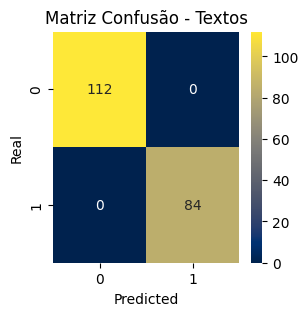

In [150]:
# Plotando figura

plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='cividis')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Matriz Confusão - Textos')
plt.show()

## Avaliando na base de teste

In [151]:
# Importando a base de teste

base_dados_teste = pd.read_csv('/content/base_teste.txt', encoding = 'utf-8')
base_dados_teste.head()

,texto,emocao
0,não precisei pagar o ingresso,alegria
1,se eu ajeitar tudo fica bem,alegria
2,minha fortuna ultrapassará a sua,alegria
3,sou muito afortunado,alegria
4,é benéfico para todos esta nova medida,alegria


In [152]:
# Fazendo o processamento somente na coluna texto

base_dados_teste['texto'] = base_dados_teste['texto'].apply(preprocessamento) # aplicando a função
base_dados_teste

,texto,emocao
0,precisar pagar ingresso,alegria
1,ajeitar ficar,alegria
2,fortuna ultrapassar,alegria
3,afortunar,alegria
4,benéfico medida,alegria
...,...,...
79,notificar medo perder guarda de o filha,medo
80,angustiada filho em o rua,medo
81,abominável animal,medo
82,terrível tigre quase matar,medo


In [153]:
# Pegando as previsoes e obtendo o resultado real, tirando da forma de dicionário e retornando apenas a previsão

previsoes = []
for texto in base_dados_teste['texto']:
  #print(texto)
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [154]:
# Pegando apenas os valores sem o dict

previsoes_final = []
for previsao in previsoes:
  if previsao['ALEGRIA'] > previsao['MEDO']:
    previsoes_final.append('alegria')
  else:
    previsoes_final.append('medo')

previsoes_final = np.array(previsoes_final)

In [155]:
# Obtendo as respostas reais da base de dados

respostas_reais = base_dados_teste['emocao'].values

In [156]:
# Accuracy Score

print(f'A taxa de acerto foi de: {accuracy_score(respostas_reais, previsoes_final)}')

A taxa de acerto foi de: 0.5238095238095238


In [160]:
# Relatório de classificação

print(f'Relatório de classificação: \n{classification_report(respostas_reais, previsoes_final)}')

Relatório de classificação: 
              precision    recall  f1-score   support

     alegria       0.59      0.56      0.57        48
        medo       0.45      0.47      0.46        36

    accuracy                           0.52        84
   macro avg       0.52      0.52      0.52        84
weighted avg       0.53      0.52      0.53        84



In [158]:
# Matriz de confusão

cm_teste = confusion_matrix(respostas_reais, previsoes_final)
cm_teste

array([[27, 21],
       [19, 17]])

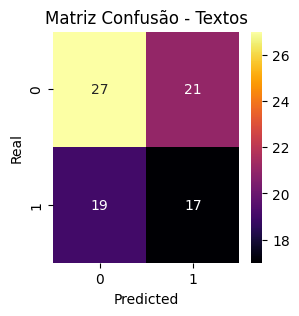

In [159]:
# Gerando matriz de confusão

plt.figure(figsize=(3, 3))
sns.heatmap(cm_teste, annot=True, fmt='d', cmap='inferno')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Matriz Confusão - Textos')
plt.show()